# Advertising Data

Contains data on advertsing spending on TV, radio, and newspaper, as well as corresponding sales figures. The goal of using this dataset is to build a linear regresion model to predict sales based on the advertising spending on each medium. 

## Loading Python Libraries

In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the Data


In [65]:
advert = pd.read_csv("../data/advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# understand the data types
advert.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [4]:
# understand the data 
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Data Preparation

In [5]:
# checking for missing values
advert.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [6]:
# checking for duplicates
advert.duplicated().any()

False

In [7]:
# identifying outliers
def identify_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr * (len(data[column])/(len(data[column]) + 1)))
    upper_bound = q3 + (1.5 * iqr * (len(data[column])/(len(data[column]) + 1)))

    # Identify the outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return (outliers)

identify_outliers(advert, "TV")
identify_outliers(advert, "Radio")
identify_outliers(advert, "Newspaper")

16     114.0
101    100.9
Name: Newspaper, dtype: float64

## Exploratory Data Analysis

### Univariate Analysis

In [26]:
def descriptive_statistics(data, column):
    mean = np.mean(data[column])  
    median = np.median(data[column])
    mode = stats.mode(np.array(data[column]))
    std = np.std(data[column])
    range = np.ptp(data[column])

    print(f"Mean : {mean:.3f}")
    print(f"Median : {median}")
    print(f"Mode : {mode}")
    print(f"Standard Deviation : {std:.3f}")
    print(f"Range : {range}")


In [27]:
descriptive_statistics(advert, "TV")

Mean : 147.042
Median : 149.75
Mode : ModeResult(mode=array([17.2]), count=array([2]))
Standard Deviation : 85.639
Range : 295.7


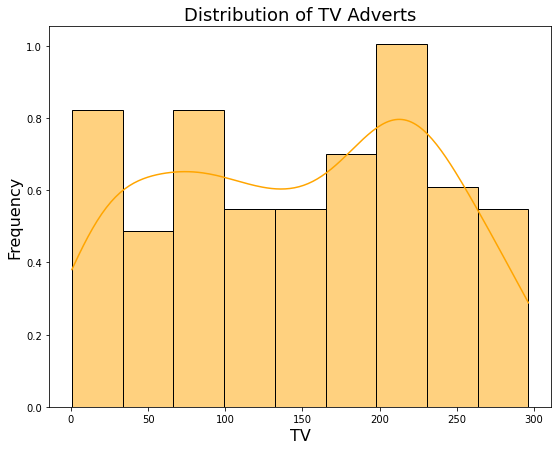

In [28]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.histplot(advert["TV"], stat = 'frequency', color = "orange", kde=True, ax=ax)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("TV", fontsize=16)
ax.set_title("Distribution of TV Adverts", fontsize=18)

plt.show()

In [29]:
descriptive_statistics(advert, "Sales")

Mean : 15.131
Median : 16.0
Mode : ModeResult(mode=array([11.9]), count=array([5]))
Standard Deviation : 5.271
Range : 25.4


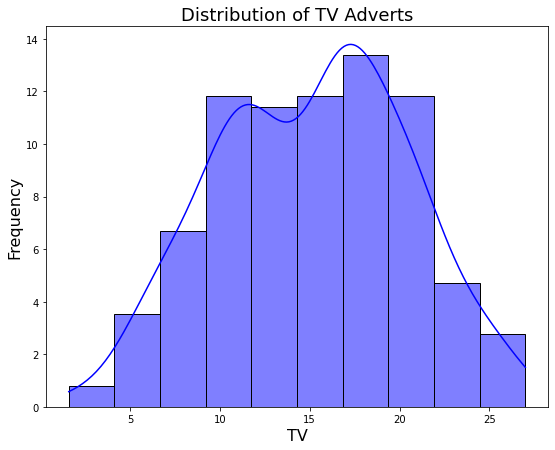

In [31]:
# visualize using data 
fig, ax = plt.subplots(figsize=(9,7))

sns.histplot(advert["Sales"], stat = 'frequency', color = "blue", kde=True, ax=ax)
ax.set_ylabel("Frequency", fontsize=16)
ax.set_xlabel("TV", fontsize=16)
ax.set_title("Distribution of TV Adverts", fontsize=18)

plt.show()

### Bivariate Analysis

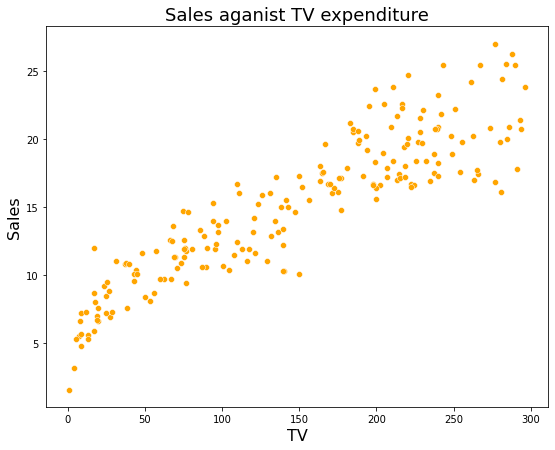

In [53]:
# visualize
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=advert["TV"], y=advert["Sales"], color="orange", ax=ax)
ax.set_ylabel("Sales", fontsize=16)
ax.set_xlabel("TV", fontsize=16)
ax.set_title("Sales aganist TV expenditure", fontsize=18)

plt.show()

## Modelling

In [66]:
# prepare data 
X = advert["TV"]
x = np.array(X).reshape(-1,1)
y = advert["Sales"]

In [67]:
# create the model object
lin_reg = LinearRegression()

In [68]:
# fit the model to the data
model = lin_reg.fit(x, y)

In [69]:
# make predictions 
advert["predictions"] = lin_reg.predict(x)
advert.head()

,TV,Radio,Newspaper,Sales,predictions
0,230.1,37.8,69.2,22.1,19.737265
1,44.5,39.3,45.1,10.4,9.443004
2,17.2,45.9,69.3,12.0,7.928816
3,151.5,41.3,58.5,16.5,15.377734
4,180.8,10.8,58.4,17.9,17.002852


In [70]:
# calculate the residuals and test for normality
advert["residuals"] = advert["Sales"] - advert["predictions"]
advert.head()

,TV,Radio,Newspaper,Sales,predictions,residuals
0,230.1,37.8,69.2,22.1,19.737265,2.362735
1,44.5,39.3,45.1,10.4,9.443004,0.956996
2,17.2,45.9,69.3,12.0,7.928816,4.071184
3,151.5,41.3,58.5,16.5,15.377734,1.122266
4,180.8,10.8,58.4,17.9,17.002852,0.897148


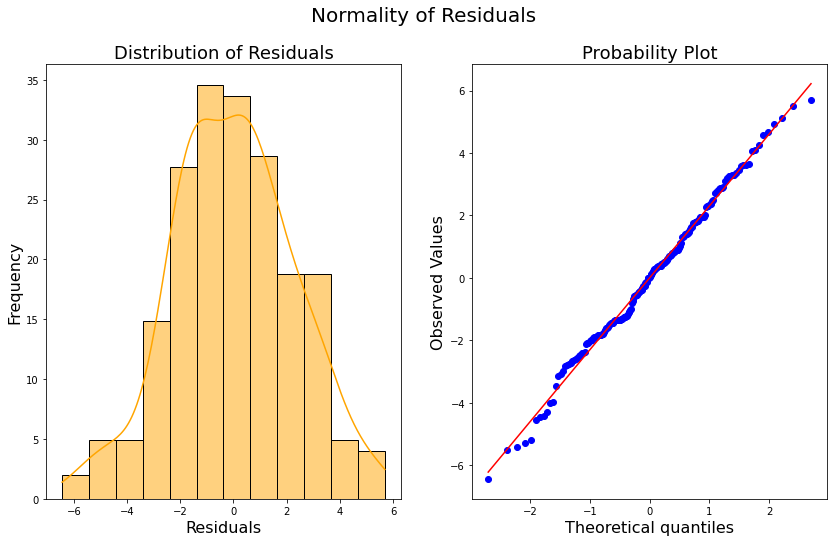

In [71]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(14,8))

# using a histogram
sns.histplot(advert["residuals"], stat = 'frequency', color = "orange", kde=True, ax=ax[0])
ax[0].set_ylabel("Frequency", fontsize=16)
ax[0].set_xlabel("Residuals", fontsize=16)
ax[0].set_title("Distribution of Residuals", fontsize=18)

# using a q-q plot 
stats.probplot(advert["residuals"], plot=ax[1])
ax[1].set_ylabel("Observed Values", fontsize=16)
ax[1].set_xlabel("Theoretical quantiles", fontsize=16)
ax[1].set_title("Probability Plot", fontsize=18)

fig.suptitle("Normality of Residuals", fontsize=20)

plt.show()

In [72]:
# performing durbin-watson test for independence of observations assumptions 
durbin_watson_statistic = sm.stats.stattools.durbin_watson(advert["residuals"])
print("Durbin-Wason statistic:", durbin_watson_statistic)

Durbin-Wason statistic: 2.0294364067116586


In [73]:
# calculate the mean and standard deviation of residuals
residuals_mean = np.mean(advert["residuals"])
residuals_std = np.std(advert["residuals"], ddof=1)

# calculate the standardized residuals
advert["std_resid"] = advert["residuals"] / residuals_std

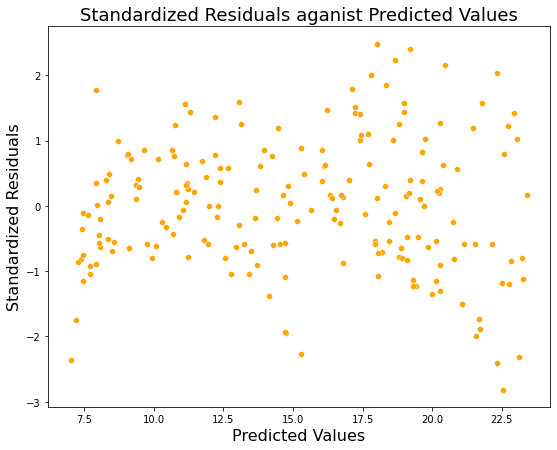

In [74]:
# visualize
fig, ax = plt.subplots(figsize=(9,7))

sns.scatterplot(x=advert["predictions"], y=advert["std_resid"], color="orange", ax=ax)
ax.set_ylabel("Standardized Residuals", fontsize=16)
ax.set_xlabel("Predicted Values", fontsize=16)
ax.set_title("Standardized Residuals aganist Predicted Values", fontsize=18)

plt.show()

In [75]:
# slope
model.coef_

array([0.05546477])

In [76]:
# y-intercept
model.intercept_

6.974821488229891

## Evaluation

In [77]:
# coefficient of determination R^2 of the prediction
model.score(x, y)

0.8121757029987414

In [78]:
# rmse 
mse = mean_squared_error(advert["Sales"], advert["predictions"])
rmse = np.sqrt(mse)
print(f"The Mean Squarred Error: {np.round(rmse,4)}")

The Mean Squarred Error: 2.2842
